# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [166]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [167]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [168]:
def P1(num_examples=5):
### STUDENT START ###

    for i in range(num_examples):
        print 'Example %s:\n\nText:\n' % str(i + 1) 
        print train_data[i]
        print '\nLabel: %s\n\n' % newsgroups_train.target_names[train_labels[i]]


### STUDENT END ###
P1()

Example 1:

Text:

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Label: comp.graphics


Example 2:

Text:



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [169]:
def P2():
### STUDENT START ###
   
    def get_avg_num_non_zero_features(tf_matrix):
        
        # for each example, store the number of non-zero features
        num_non_zero_features_per_example = [len(tf_matrix[i].nonzero()[1]) 
                                            for i in range(tf_matrix.shape[0])]

        # calculate the average
        return np.mean(num_non_zero_features_per_example)
    
    
    def a():
        print '2a.'
        
        # get vocabulary size        
        vocabulary_size = sparse_matrix.shape[1]
        #vocabulary_size = len(vectorizer.vocabulary_) # alternatively
        
        print '\t The vocabulary contains %s words.' % vocabulary_size 

        avg_num_non_zero_features = get_avg_num_non_zero_features(sparse_matrix)

        print '\t The average number of non-zero features per example is: {0:.5f}.'.format(
            avg_num_non_zero_features)
     
        # get the fraction of non-zero entries
        
        total_entries = sparse_matrix.shape[0] * sparse_matrix.shape[1] 
        fraction_non_zero_entries = sparse_matrix.nnz / float(total_entries)

        print '\t The fraction of non-zero entries is: {0:.5f}.'.format(
            fraction_non_zero_entries)

    
    def b():
        print
        print '2b.'
        
        sorted_feature_names_list = sorted(vectorizer.get_feature_names())
        feature_names_list_len = len(sorted_feature_names_list) 
        first_feature_string = sorted_feature_names_list[0]
        last_feature_string = sorted_feature_names_list[feature_names_list_len - 1]
       
        print '\t The first feature string is: ' + first_feature_string
        print '\t The last feature string is: ' + last_feature_string
        
      
    def c():
        print 
        print '2c.'
        
        vocab = ['atheism', 'graphics', 'space', 'religion']
        vocab_size = len(vocab)
        
        vocab_indices = [idx for idx, name in enumerate(feature_names) if 
                    name in vocab]

        reduced_vocab_matrix = sparse_matrix[:, vocab_indices]
        
        avg_num_non_zero_features = get_avg_num_non_zero_features(reduced_vocab_matrix)
            
        print '\t Considering only four-word vocabulary, the avg number of ' + \
            'non-zero features is: %5f.' % avg_num_non_zero_features    
    
    def d():
        print 
        print '2d.'
        
        # tokenize into character features of length 2
        vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,2))
        matrix = vectorizer.fit(train_data)
        
        print '\t Vocabulary size using bigram character features: {}'.format( 
            len(vectorizer.vocabulary_))
        
        # tokenize into character features of length 3
        vectorizer = CountVectorizer(analyzer='char', ngram_range=(3,3))
        matrix = vectorizer.fit(train_data)
        
        print '\t Vocabulary size using trigram character features: {}'.format( 
            len(vectorizer.vocabulary_))
        
    def e():
        print 
        print '2e.'
        
        vectorizer = CountVectorizer(min_df=10)
        matrix = vectorizer.fit_transform(train_data)
        vocab_len = len(vectorizer.vocabulary_)
        
        print '\t With a min document frequency of 10, the vocabulary size is: %s' % vocab_len 
        
    def f():
        print 
        print '2f.'
        
        train_vectorizer = CountVectorizer()
        train_matrix = vectorizer.fit_transform(train_data)
        train_vocab = vectorizer.vocabulary_
        
        dev_vectorizer = CountVectorizer()
        dev_matrix = vectorizer.fit_transform(dev_data)
        dev_vocab = vectorizer.vocabulary_ 
    
        words_only_in_dev = len(set(dev_vocab.keys()) - set(train_vocab.keys()))
        fraction_only_in_dev = words_only_in_dev / float(len(dev_vocab))
        
        print '\t The fraction of words missing from the vocabulary is: %.3f' % fraction_only_in_dev
        
    # instantiate the vectorizer and create the output matrix
    vectorizer = CountVectorizer()
    sparse_matrix = vectorizer.fit_transform(train_data)
    global feature_names 
    feature_names = vectorizer.get_feature_names()
    
    # answer the posed questions
    a()
    b()
    c()
    d()
    e()
    f()

### STUDENT END ###
P2()

2a.
	 The vocabulary contains 26879 words.
	 The average number of non-zero features per example is: 96.70600.
	 The fraction of non-zero entries is: 0.00360.

2b.
	 The first feature string is: 00
	 The last feature string is: zyxel

2c.
	 Considering only four-word vocabulary, the avg number of non-zero features is: 0.268437.

2d.
	 Vocabulary size using bigram character features: 3291
	 Vocabulary size using trigram character features: 32187

2e.
	 With a min document frequency of 10, the vocabulary size is: 3064

2f.
	 The fraction of words missing from the vocabulary is: 0.248


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [170]:
def P3():
### STUDENT START ###

    # initialize the vectorizer
    # and learn the vocabulary
    # from the training data
    vectorizer = CountVectorizer()
    vectorizer.fit(train_data)

    # create matrices for the word counts in 
    # the training and dev data
    global train_vector
    global dev_vector
    
    train_vector = vectorizer.transform(train_data)
    dev_vector = vectorizer.transform(dev_data)

    def evaluate_default_model(model):
        # instantiate a the classifier and train
        # it on the training data
        model.fit(train_vector, train_labels)
        
        # use the classifier to predict dev labels
        predicted = model.predict(dev_vector)
        
        # calculate the f1 score for each category
        scores = metrics.f1_score(predicted, dev_labels, average=None)
        
        # print the results
        print 'Category \t\t Score \n'

        for i in range(len(scores)):
            format_str = '{0} \t\t {1:.3f}'
            if i == 3:
                format_str = '{0} \t {1:.3f}'
                    
            print format_str.format(newsgroups_train.target_names[i], scores[i])

        print
        print 'Avg F1 Score: {0:.3f}\n'.format(sum(scores) / len(scores))
    
    def get_best_param(model, params):
        # get the best parameter
        estimator = GridSearchCV(estimator=model, param_grid=params)
        estimator.fit(train_vector, train_labels)

        # predict the labels for the dev data using the best parameter
        predicted = estimator.predict(dev_vector)

        # calculate the F1 score for each category
        f1_scores = metrics.f1_score(predicted, dev_labels, average=None)

        # get the average F1 score across categories
        mean_f1_score = sum(f1_scores) / len(f1_scores)

        # display the results
        param = params.keys()[0]
        print 'The best value for {0} is {1} with a mean F1 score of {2:.3f}\n'.format(
            param, estimator.best_params_[param], mean_f1_score)
    
    # fit a k-nearest neighbors model
    
    print 'F1 Scores for KNN with K = 5: \n'
    evaluate_default_model(model=KNeighborsClassifier())
    
    
    # find the optimal value for K
    max_k = 25
    params = {'n_neighbors': range(1, max_k + 1)}
    print 'Searching for best K up to {0}...\n'.format(max_k) 
    
    get_best_param(model=KNeighborsClassifier(), params=params)

    # fit a Naive Bayes model
    print
    print 'F1 scores for Multinomial Naive Bayes with alpha = 1:\n'
    
    evaluate_default_model(model=MultinomialNB())
    
    print
    print 'Searching for best alpha...\n'
    alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    get_best_param(model=MultinomialNB(), params=alphas)  

    # fit a logistic regression model
    print 
    print 'F1 scores for Logistic Regression with regularization of 1:\n'
    
    evaluate_default_model(model=LogisticRegression())

    print 
    print 'Searching for best regularization strength C...\n'
    # values from https://stackoverflow.com/a/21818810
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
    get_best_param(model=LogisticRegression(), params=param_grid)
    
    # get squared sums of weights 
    # for each class for each value of C
    for c_val in param_grid['C']:
        lr = LogisticRegression(C=c_val)
        lr.fit(train_vector, train_labels)
        
        print 'Weights for C = {0}'.format(c_val)
        print 'Class \t\t\t Sum of Squared Weights\n'
        
        for i in range(lr.coef_.shape[0]):
            sum_square_weights = sum(lr.coef_[i] ** 2)
  
            format_str = '{0} \t\t {1:.3f}'
            if i == 3:
                format_str = '{0} \t {1:.3f}'
            
            print format_str.format(newsgroups_train.target_names[i], sum_square_weights)
        
        print
        
    
### STUDENT END ###
P3()

F1 Scores for KNN with K = 5: 

Category 		 Score 

alt.atheism 		 0.427
comp.graphics 		 0.475
sci.space 		 0.492
talk.religion.misc 	 0.264

Avg F1 Score: 0.415

Searching for best K up to 25...

The best value for n_neighbors is 20 with a mean F1 score of 0.410


F1 scores for Multinomial Naive Bayes with alpha = 1:

Category 		 Score 

alt.atheism 		 0.683
comp.graphics 		 0.918
sci.space 		 0.854
talk.religion.misc 	 0.575

Avg F1 Score: 0.758


Searching for best alpha...

The best value for alpha is 0.01 with a mean F1 score of 0.755


F1 scores for Logistic Regression with regularization of 1:

Category 		 Score 

alt.atheism 		 0.588
comp.graphics 		 0.807
sci.space 		 0.766
talk.religion.misc 	 0.556

Avg F1 Score: 0.679


Searching for best regularization strength C...

The best value for C is 0.1 with a mean F1 score of 0.679

Weights for C = 0.001
Class 			 Sum of Squared Weights

alt.atheism 		 0.165
comp.graphics 		 0.201
sci.space 		 0.181
talk.religion.misc 	 0.187

We

ANSWER: 

a. The K-nearest neighbors model appears to be ineffective for textual analysis, at least for this example and using the default algorithm and distance metric. Some reasons may include the sparsity of the data (i.e. missing features for many examples) and assigning equal importance to all features when we know that some words are more important than others (see some discussion <a href="https://www.quora.com/Classification-machine-learning-When-should-I-use-a-K-NN-classifier-over-a-Naive-Bayes-classifier">here</a>).  

b. Naive Bayes may be more effective on smaller datasets, such as this one (see https://web.stanford.edu/~jurafsky/slp3/7.pdf p. 9).

c. The sum of the squared weights increases as C increases. As C is the inverse of the regularization strength, the weights increase as the regularization strength decreases. 

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [171]:
def P4():
### STUDENT START ###

    def get_top_features(all_feature_names, num_features=5):
        '''Get the features with the highest weights in each class.

        Returns a list of tuples containing the feature name and index,
        so that the weights can be gathered for the other classes as well.
        '''
    
        feature_list = []

        # convert to np.array for indexing 
        feature_names = np.array(all_feature_names) 

        # iterate over each class
        for i in range(lr.coef_.shape[0]):
            # get the indices for the nlargest features
            # https://stackoverflow.com/a/23734295
            feature_indices = np.argpartition(lr.coef_[i], -num_features)[-num_features:]

            # get the feature names corresponding to the index
            features_for_class = feature_names[feature_indices]

            # create tuples containing the name and index for each feature
            for j in range(num_features):
                feature_list.append((str(features_for_class[j]), feature_indices[j]))

        return feature_list

    def build_table(feature_list):
        import pandas as pd

        a=[]
        for i in range(len(feature_list)):
            a.append([lr.coef_[j][feature_list[i][1]] for j in range(len(categories))])

        df = pd.DataFrame(data=a, index=[f[0] for f in feature_list], columns=newsgroups_train.target_names)
        df = df.round(decimals=3)

        print df
            
    # train the model
    lr = LogisticRegression()
    lr.fit(train_vector, train_labels)

    # get the 20 features with the highest weights
    feature_list = get_top_features(feature_names)

    print 'Highest-weighted features for unigrams:\n'
    build_table(feature_list)

    # repeat the above but with bigram features
    bi_gram_vectorizer = CountVectorizer(ngram_range=(2, 2))
    bi_gram_vector = bi_gram_vectorizer.fit_transform(train_data)

    lr.fit(bi_gram_vector, train_labels)

    bi_gram_feature_list = get_top_features(all_feature_names=bi_gram_vectorizer.get_feature_names())

    print '\nHighest-weighted features for bigrams:\n'
    build_table(bi_gram_feature_list)

### STUDENT END ###
P4()

Highest-weighted features for unigrams:

            alt.atheism  comp.graphics  sci.space  talk.religion.misc
atheism           0.939         -0.409     -0.449              -0.435
bobby             0.990         -0.221     -0.341              -0.463
religion          0.954         -0.617     -0.792              -0.064
atheists          1.028         -0.097     -0.321              -0.835
deletion          1.125         -0.398     -0.420              -0.396
computer          0.143          0.978     -0.682              -0.487
3d               -0.359          1.125     -0.702              -0.379
file             -0.335          1.266     -0.806              -0.626
image            -0.582          1.346     -0.826              -0.470
graphics         -0.759          1.937     -1.336              -0.763
spacecraft       -0.355         -0.394      0.920              -0.381
nasa             -0.572         -0.480      1.011              -0.468
launch           -0.469         -0.465      0.936

ANSWER: The features in general are more suprising for the bigrams than the unigrams. Some appear to be common phrases, such as "in advance", while others appear to be specific to the data, such as the signature "cheers kent". This indicates overfitting (Kent may be a frequent contributor in the atheism forum) and might be resolved by a stronger regularization parameter.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [172]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s, replace_all_s=False):
### STUDENT START ###
    ret = [text.lower()
           .replace('ing', '') 
           .replace('ed', '') # worse
           .replace('ly', '') # worse
           .replace('es', '')
           .replace('#', '')
           .replace('@', '')
           .replace('$', '')
           .replace('&', '')
           for text in s] 
    
    # singularize all of the words
    ret = [re.sub(r's\s', ' ', r) for r in ret] # s followed by a space

    # removing all 's' chars improves performance, which is not reasonable 
    if replace_all_s:
        ret = [r.replace('s', '') for r in ret]  
    
    return ret
### STUDENT END ###

def P5(replace_all_s=False):
### STUDENT START ###
    baseline_score, baseline_vocab_size = 0.679, 26879
    
    preprocessed_train_data = better_preprocessor(train_data, replace_all_s=replace_all_s)
    preprocessed_dev_data = better_preprocessor(dev_data, replace_all_s=replace_all_s)

    vectorizer = CountVectorizer()
    vectorizer.fit(preprocessed_train_data)
    vocabulary_size = len(vectorizer.vocabulary_)
    
    preprocessed_train_vector = vectorizer.transform(preprocessed_train_data)
    preprocessed_dev_vector = vectorizer.transform(preprocessed_dev_data)

    lr = LogisticRegression()
    lr.fit(preprocessed_train_vector, train_labels)

    predicted = lr.predict(preprocessed_dev_vector)

    scores = metrics.f1_score(predicted, dev_labels, average=None)

    improvement = (np.mean(scores) - baseline_score) * 100
    
    if replace_all_s:
        technique = 'Replacing all \'s\' characters, which is unreasonable,\n'
    else:
        technique = 'Using standard stemming, replacing symbols and singularizing all words,\n'
        
    print technique + 'we achieved an improvement of {0:.3f} points and reduced the vocabulary by {1} words.'\
    .format(improvement, baseline_vocab_size - vocabulary_size)

### STUDENT END ###
P5()
print
P5(replace_all_s=True)

Using standard stemming, replacing symbols and singularizing all words,
we achieved an improvement of 0.243 points and reduced the vocabulary by 3155 words.

Replacing all 's' characters, which is unreasonable,
we achieved an improvement of 1.658 points and reduced the vocabulary by 5435 words.


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

Using an l2 penalty, there are 107516 non-zero weights.
Using an l1 penalty, there are 1740 non-zero weights.

Mean F1 score after retraining l2 model with reduced vocabulary: 0.663

Mean F1 scores after adjusting C in l1 model:


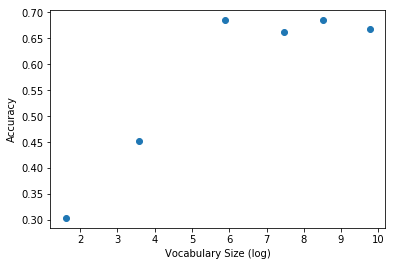

In [173]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

### STUDENT START ###
    def get_num_non_zero_weights(model):
        return len(model.coef_.nonzero()[0])
    
    def reduce_vocab(model):
        # get any feature (column) that is non-zero for any of the classes
        feature_indices = np.unique(model.coef_.nonzero()[1])
        
        # filter out all other features from the train and dev matrices 
        return train_vector[:, feature_indices], dev_vector[:, feature_indices]
    
    def train_l1_model(c=1, tol=.01):
        # used to train l1 models with various values for C.
        model = LogisticRegression(penalty='l1', C=c, tol=tol)
        model.fit(train_vector, train_labels)
        
        return model
        
    def train_l2_model(matrix, labels, tol=.01):
        # used to train l2 models with vocabularies of 
        # varying sizes
        model = LogisticRegression(penalty='l2', tol=tol)
        model.fit(matrix, labels)
        
        return model
    
    def train_l1_l2_models(c=1):
        # First train an l1 model with regularization strength c,
        # then reduce the vocabulary according to the non-zero feature weights,
        # then train an l2 model using only the reduced vocabulary.
        # Return the number of non-zero feature weights and the resulting f1 score.
        lr_1 = train_l1_model(c=c)
        
        # the train and dev matrices are both produced by the vectorizer and
        # have the same number of columns (features). We need to splice the 
        # non-zero features from both. 
        reduced_train_matrix, reduced_dev_matrix = reduce_vocab(lr_1)
    
        lr_2 = train_l2_model(reduced_train_matrix, train_labels)
    
        predicted = lr_2.predict(reduced_dev_matrix)
    
        f1_score = metrics.f1_score(predicted, dev_labels, average=None)
    
        mean_f1_score = np.mean(f1_score)
        
        num_non_zero_weights = get_num_non_zero_weights(lr_1)
        
        # print results for the default regularization strength only
        if c == 1:
            print 'Using an l1 penalty, there are {0} non-zero weights.\n'.format(
                num_non_zero_weights)
            
            print 'Mean F1 score after retraining l2 model with reduced vocabulary: {:.3f}'.format(
                mean_f1_score)
    
        return num_non_zero_weights, mean_f1_score
    
    # train an l2 model to get the number of non-zero
    # feature weights
    lr_2 = train_l2_model(train_vector, train_labels)
    
    print 'Using an l2 penalty, there are {0} non-zero weights.'.format(
        get_num_non_zero_weights(lr_2))
    
    # get the results of pruning the vocabulary by first training an l1 model
    # and passing the resulting non-zero features to an l2 model
    non_zero_weights, mean_f1_scores = [], []
    
    for c in [.001, .01, .1, 1, 10, 100]:        
        num_weights, mean_f1_score = train_l1_l2_models(c)
        
        non_zero_weights.append(num_weights)
        
        mean_f1_scores.append(mean_f1_score)
    
    print
    print 'Mean F1 scores after adjusting C in l1 model:'
    
    plt.plot(np.log(non_zero_weights), mean_f1_scores, 'o')
    plt.xlabel('Vocabulary Size (log)')
    plt.ylabel('Accuracy')
### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [174]:
def P7():
    ### STUDENT START ###

    # instantiate the vectorizer and
    # learn the vocabulary and inverse document frequency
    vectorizer = TfidfVectorizer().fit(train_data)
    
    # get document-term matrices for training and dev docs
    train_matrix = vectorizer.transform(train_data)
    dev_matrix = vectorizer.transform(dev_data)
    
    # train the classification model
    lr = LogisticRegression(C=100)
    lr.fit(train_matrix, train_labels)

    # predict the dev labels
    predicted = lr.predict(dev_matrix)

    # evaluate results
    print 'Accuracy: {0:.3f}'.format(metrics.accuracy_score(predicted, dev_labels))
    print 'Mean f1 score: {0:.3f}'.format(np.mean(
        metrics.f1_score(predicted, dev_labels, average=None)))

    # get the predicted probabilities of each label
    # for each sample
    predicted_probs = lr.predict_proba(dev_matrix)

    # calculate R for each example, which is the maximum
    # probability for the example divided by the probability
    # assigned to the correct label
    R_vector = np.amax(predicted_probs, axis=1) / \
        predicted_probs[np.array(range(len(dev_labels))), dev_labels]

    # get the indices for the three largest values of R  
    three_largest = np.argsort(R_vector)[-3:]

    print '\nThe 3 documents with the highest R value:\n'

    # show the post and label corresponding to the indices
    for idx in three_largest:
        print 'Text: \n'
        print dev_data[idx]
        print '\nPredicted Label: \n'
        print newsgroups_train.target_names[np.argmax(predicted_probs[idx])]
        print '\nActual Label: \n'
        print newsgroups_train.target_names[dev_labels[idx]]
        print
        print

        ### STUDENT END ###
P7()

Accuracy: 0.763
Mean f1 score: 0.747

The 3 documents with the highest R value:

Text: 


The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


Predicted Label: 

talk.religion.misc

Actual Label: 

alt.atheism


Text: 

Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.

Predicted Label: 

comp.graphics

Actual Label: 

talk.religion.misc


Text: 

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the thr

ANSWER: The Tfidf-Vectorizer applies a transform to increase the impact of rarer words. Of the three misclassified documents with the highest R values, two predict a label of <i>graphics</i> when the correct label is <i>religion</i>. The third document is classified as <i>religion</i> when the correct label is <i>atheism</i>. In the first two cases, the posts discuss the online distribution of a book and so contain a number of words that we might expect to be common in a technical document rather than one about religion, such as <i>ftp</i>, <i>email</i>, <i>internet</i>, <i>LaTeX</i> or <i>Laserwriter</i>. We might try to determine if there are words in the vocabulary that, while rare overall, are relatively common to two are more categories and penalize them accordingly. In these two cases, it would likely also help to assign a higher weight to capitalized words, which would capture the name of the book, which contains the word Mormon.

The remaining example is a very short piece of text. We might try to improve results here by incorporating more data, such as a response to the post, or other features, if possible, because it seems otherwise difficult to classify. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance